In [1]:
#all packages and dataframes
import numpy as np
#import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline 
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['mem','glass','semantic','motor']
modelList=['Log','Ridge','SVM']
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
thisDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/results/')
homeDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/')
figsDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/figures/')
sys.path.append(homeDir+'code/pyScripts/Predictions')
import reshape
Parcel_params = reshape.loadParcelParams('Gordon333')
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)
#MSC Palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)
# 5th Percentile
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)
#Figure 2 all task vs rest and single task 
allTask_Binary=pd.read_csv(thisDir+'Ridge/ALL_Binary/acc.csv',usecols=['train_sub','same_sub','diff_sub'])
allTask_Binary=pd.melt(allTask_Binary,id_vars=['train_sub'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
single_task=pd.read_csv(thisDir+'Ridge/single_task/acc.csv',usecols=['train_sub','task','same_sub','diff_sub'])
single_task=pd.melt(single_task,id_vars=['train_sub','task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')

#Figure 3 multiclass
MC=pd.read_csv(thisDir+'Ridge/ALL_MC/acc.csv',usecols=['train','acc','Analysis'])
MC.drop_duplicates(inplace=True)

group_MC=pd.read_csv(thisDir+'Ridge/ALL_MC/groupwise_acc.csv')
g_MC=group_MC.mean()[0]
#Supp Fig matched samples group avg compared to single task
allTask_group=pd.read_csv(thisDir+'Ridge/ALL_Binary/groupwise_acc.csv')
mL_group=allTask_group.mean()
single_task_matched=pd.read_csv(thisDir+'Ridge/single_task/acc_matched_groupavg.csv',usecols=['train_sub','task','same_sub','diff_sub'])
single_task_matched=pd.melt(single_task_matched,id_vars=['train_sub','task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
single_task_group=pd.read_csv(thisDir+'Ridge/single_task/groupwise_acc.csv')
single_task_group['Analysis']='group'
comp_single_task=single_task_matched.groupby(['task','Analysis']).mean()
comp_single_task.reset_index(inplace=True)
compare_group=pd.concat([comp_single_task, single_task_group])

LOSO_group =pd.read_csv(thisDir+'Ridge/single_task/groupwise_LOSO_acc.csv')
LOSO_group['Analysis'] = 'group_LOSO'
compare_group_all = pd.concat([compare_group, LOSO_group])


#Groupwise incremental samples
incremental = pd.read_csv(thisDir +'Ridge/single_task/incremental_groupavg.csv')
incremental['samples']= incremental['sample_per_sub']*7
"""
#Figure 5 Blockwise 
blockwise=pd.read_csv(thisDir+'Ridge/ALL_Binary/blockNet_acc.csv')

#Figure 6 Feature Selection 
allTask_nets=pd.read_csv(thisDir+'Ridge/ALL_Binary/wholeNet_acc.csv')
single_task_nets=pd.read_csv(thisDir+'Ridge/single_task/wholeNet_acc.csv')
allTask_rand=pd.read_csv(thisDir+'Ridge/ALL_Binary/rdmNet_acc.csv')
single_task_rand=pd.read_csv(thisDir+'Ridge/single_task/rdmNet_acc.csv')


prc_single_task_sameSub=single_task_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})
prc_single_task_sameSub = prc_single_task_sameSub.columns.droplevel()
prc_single_task_sameSub.reset_index(inplace=True)

prc_single_task_diffSub=single_task_rand.groupby(['feature']).agg({'diff_sub': [p5, p95]})
prc_single_task_diffSub = prc_single_task_diffSub.columns.droplevel()
prc_single_task_diffSub.reset_index(inplace=True)

prc_allTask_sameSub=allTask_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})
prc_allTask_sameSub = prc_allTask_sameSub.columns.droplevel()
prc_allTask_sameSub.reset_index(inplace=True)

prc_allTask_diffSub=allTask_rand.groupby(['feature']).agg({'diff_sub': [p5, p95]})
prc_allTask_diffSub = prc_allTask_diffSub.columns.droplevel()
prc_allTask_diffSub.reset_index(inplace=True)

#Figure 7 Network parcellation
indNet=pd.read_csv(thisDir+'Ridge/ALL_IndNet/acc.csv',usecols=['train_sub','cv','ds'])
indNet=pd.melt(indNet,id_vars=['train_sub'],value_vars=['cv','ds'],var_name='Analysis',value_name='acc')

#Supp Figure 1 Manipulating days
manDays=pd.read_csv(thisDir+'Ridge/ALL_Binary/manDays.csv')
prc_manDays=manDays.groupby(['Days','Analysis']).agg({'acc': [p5, p95]})
prc_manDays.columns = percentiles_manDays.columns.droplevel()
prc_manDays.reset_index(inplace=True)
diff_prc=prc_manDays[prc_manDays.Analysis=='Different Person']
same_prc=prc_manDays[prc_manDays.Analysis=='Same Person']

#Supp Figure 2 Leave one sub out comparison
allTask_group=pd.read_csv(thisDir+'Ridge/ALL_Binary/groupwise_acc.csv')
mL_group=allTask_group.mean()
single_task_group=pd.read_csv(thisDir+'Ridge/single_task/groupwise_acc.csv')
single_task_group['Analysis']='group'
comp_single_task=single_task.groupby(['task','Analysis']).mean()
comp_single_task.reset_index(inplace=True)
compare_group=pd.concat([comp_single_task, single_task_group])

#Supp Figure 4 Different model comparison
Binary_clf=pd.DataFrame()
single_clf=pd.DataFrame()
MC_clf=pd.DataFrame()
for model in modelList:
    tmpallTask_Binary=pd.read_csv(thisDir+model+'/ALL_Binary/acc.csv',usecols=['train_sub','same_sub','diff_sub'])
    tmpsingle_task=pd.read_csv(thisDir+model+'/single_task/acc.csv',usecols=['train_sub','task','same_sub','diff_sub'])
    tmpMC=pd.read_csv(thisDir+model+'/ALL_MC/acc.csv',usecols=['train','acc','Analysis'])
    tmpMC.drop_duplicates(inplace=True)
    tmpallTask_Binary=pd.melt(tmpallTask_Binary,id_vars=['train_sub'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
    tmpallTask_Binary['clf']=model
    tmpsingle_task=pd.melt(tmpsingle_task,id_vars=['train_sub','task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
    tmpsingle_task['clf']=model
    tmpMC['clf']=model
    Binary_clf=pd.concat([tmpallTask_Binary, Binary_clf])
    single_clf=pd.concat([tmpsingle_task, single_clf])
    MC_clf=pd.concat([tmpMC, MC_clf])
"""
#Supp Figure 6 Average MC and Supp Figure 7 ind MC confusion matrices are created when running multiclassAll

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


"\n#Figure 5 Blockwise \nblockwise=pd.read_csv(thisDir+'Ridge/ALL_Binary/blockNet_acc.csv')\n\n#Figure 6 Feature Selection \nallTask_nets=pd.read_csv(thisDir+'Ridge/ALL_Binary/wholeNet_acc.csv')\nsingle_task_nets=pd.read_csv(thisDir+'Ridge/single_task/wholeNet_acc.csv')\nallTask_rand=pd.read_csv(thisDir+'Ridge/ALL_Binary/rdmNet_acc.csv')\nsingle_task_rand=pd.read_csv(thisDir+'Ridge/single_task/rdmNet_acc.csv')\n\n\nprc_single_task_sameSub=single_task_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})\nprc_single_task_sameSub = prc_single_task_sameSub.columns.droplevel()\nprc_single_task_sameSub.reset_index(inplace=True)\n\nprc_single_task_diffSub=single_task_rand.groupby(['feature']).agg({'diff_sub': [p5, p95]})\nprc_single_task_diffSub = prc_single_task_diffSub.columns.droplevel()\nprc_single_task_diffSub.reset_index(inplace=True)\n\nprc_allTask_sameSub=allTask_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})\nprc_allTask_sameSub = prc_allTask_sameSub.columns.droplevel()\npr

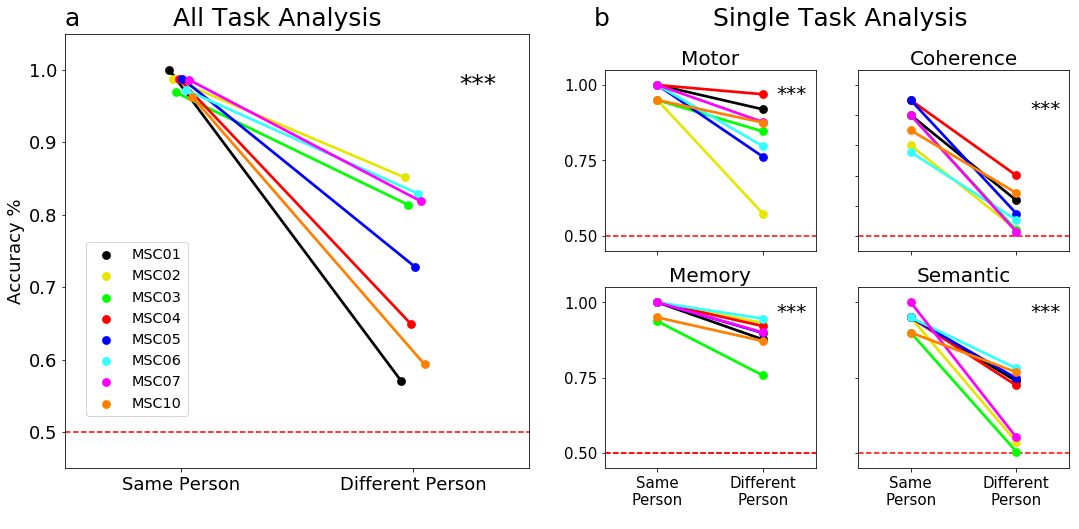

In [49]:
#Same Task (Fig 1)
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)

gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)
fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=allTask_Binary, dodge=.1,order=['same_sub','diff_sub'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
plt.text(1.2, .97, '***',fontsize=25)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=18)
ax.set(ylim=(.45, 1.05))
plt.legend(loc='center left',fontsize='x-large',bbox_to_anchor=(.03, .32))
ax.axhline(.5, ls='--',color='red')
plt.xlabel(' ')
ax.tick_params(labelsize=18)
#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='motor'], ax=ax1, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('Motor', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(.45, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
plt.setp(ax1.get_xticklabels(), visible=False)
#coherence
ax2=fig.add_subplot(gs01[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='glass'], ax=ax2, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
plt.text(1.13, .9, '***',fontsize=20)
ax.set_title('Coherence', fontsize=20, pad=5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
ax.axhline(.5, ls='--',color='red')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='mem'],ax=ax3, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5, ls='--',color='red')
plt.ylabel(' ')
plt.xlabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=15)
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='semantic'],ax=ax4, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Semantic', fontsize=20, pad=5)
ax.set_xticklabels(['Same Person','Different Person'])
plt.ylabel('')
ax.set(ylim=(.45, 1.05))
plt.xlabel('')
plt.text(1.13, .95, '***',fontsize=20)
ax.axhline(.5, ls='--',color='red')
ax.legend_.remove()
ax.tick_params('x',labelsize=15)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.savefig(figsDir+'ALL_CVDS_point_plots.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05



NameError: name 'Binary_clf' is not defined

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called Gri

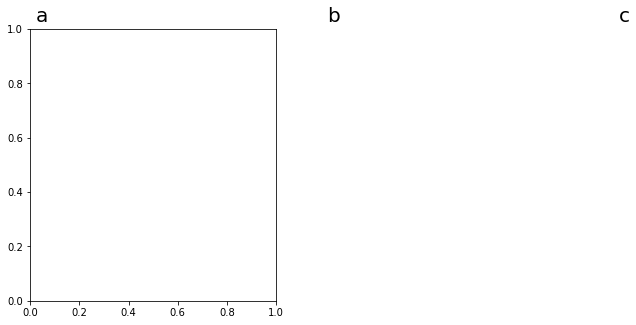

In [50]:
#Supplemental Figures
#S1
fig=plt.figure(figsize=(15,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .9, 'a',fontsize=20)
fig.text(.4, .9, 'b',fontsize=20)
fig.text(.67, .9, 'c',fontsize=20)
#this is the model comparison for BS CV SS and DS
#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=3,wspace=.2, hspace=.3)

ax0=fig.add_subplot(gs[0,0])
ax=sns.boxplot(x='acc',y='clf',hue='Analysis',data=Binary_clf,orient='h',hue_order=['same_sub','diff_sub'],ax=ax0)
ax.set_title('All Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %',fontsize=15)
plt.ylabel('Classifier',fontsize=15)
ax0.legend_.remove()
ax0.axvline(.5, ls='--')
#ax0.legend(loc='lower left',fontsize=10)
ax1=fig.add_subplot(gs[0,1])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=single_clf,orient='h',ax=ax1,hue_order=['same_sub','diff_sub'])
ax1.set_title('Single Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %', fontsize=15)
plt.ylabel('Classifier')
ax1.legend_.remove()
ax1.axvline(.5, ls='--')
plt.ylabel(' ')

ax2=fig.add_subplot(gs[0,2])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=MC_clf,orient='h',ax=ax2,hue_order=['Same Person','Different Person'])
ax2.set_title('Multiclass',fontsize=15, pad=10)
plt.xlabel('Accuracy %',fontsize=15)
plt.ylabel(' ')
ax2.axvline(.2, ls='--')
#ax2.legend_.remove()
ax2.legend(loc='upper left',fontsize=10)

plt.savefig(figsDir+'clf_comp_plots.png', bbox_inches='tight')


In [51]:
#Supp Fig 7
ax=sns.lineplot(x='Days', y='acc', hue='Analysis', data=manDays)
ax.fill_between(diff_percent['Days'],diff_percent['p5'],diff_percent['p95'],alpha=.2,color='orange')
ax.fill_between(same_percent['Days'],same_percent['p5'],same_percent['p95'],alpha=.2,color='blue')
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel("Sample Pairs", fontsize=15)
plt.legend(loc='lower right',fontsize='medium')
plt.savefig(figsDir+'samplePairplots.png', bbox_inches='tight')

NameError: name 'manDays' is not defined

NameError: name 'indNet' is not defined

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called Gri

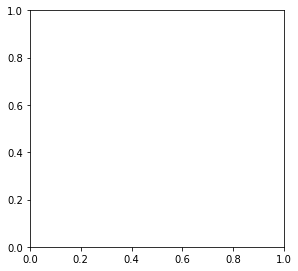

In [52]:
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
ax2=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, data=indNet, dodge=.1,order=['cv','ds'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title(' ', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(.3, .55),loc='upper right',fontsize='medium')
ax.set(xticklabels=[])
plt.savefig(figsDir+'indNet_Plot.png', bbox_inches='tight')

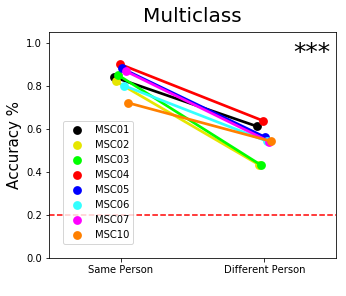

In [53]:
fig = plt.figure()
ax0 = fig.add_subplot(111, aspect=1.5) 
ax=sns.pointplot(x="Analysis",y="acc", hue="train",ci=None, data=MC, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax0)
plt.text(1.2, .92, '***',fontsize=25)
ax.set_title('Multiclass', fontsize=20, pad=10)
#y=[.5,.6,.7,.8,.9,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.axhline(.2,color='red',linestyle='--')
plt.legend(loc='lower left',fontsize='medium',bbox_to_anchor=(.03, .04))
plt.xlabel(' ')
ax.set(ylim=(0, 1.05))
plt.savefig(figsDir+'MC_Plot.png', bbox_inches='tight')

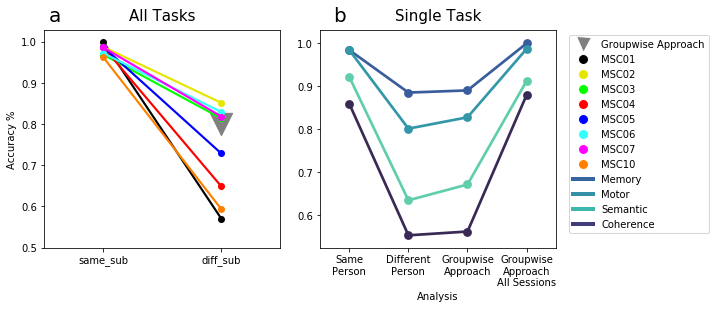

In [39]:
#Groupwise comparison
legend_elements = [Line2D([0], [0], color='w',markerfacecolor='gray', marker='v',markersize=15,label='Groupwise Approach'),
                Line2D([0], [0],  color='w',markerfacecolor=MSCdict['1'],marker='o',markersize=10,label='MSC01'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['2'],marker='o',markersize=10,label='MSC02'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['3'],marker='o',markersize=10,label='MSC03'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['4'],marker='o',markersize=10,label='MSC04'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['5'],marker='o',markersize=10,label='MSC05'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['6'],marker='o',markersize=10,label='MSC06'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['7'],marker='o',markersize=10,label='MSC07'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['10'],marker='o',markersize=10,label='MSC10'),
                  Line2D([0], [0], color='#37659e', lw=4,label='Memory'),
                   Line2D([0], [0], color='#348fa7', lw=4, label='Motor'),
                Line2D([0], [0], color='#40b7ad', lw=4,label='Semantic'),
                Line2D([0], [0], color='#413d7b', lw=4,label='Coherence')]
fig=plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(nrows=1, ncols=3,width_ratios=[2,2,1])
fig.text(.13, .91, 'a',fontsize=20)
fig.text(.46, .91, 'b',fontsize=20)
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x='Analysis',y='acc',hue='task',data=compare_group_all,legend=False,order=['same_sub','diff_sub','group','group_LOSO'],palette='mako',ax=ax1)
plt.ylabel(" ", fontsize=10)
ax.set_title('Single Task', fontsize=15, pad=10)
ax.legend_.remove()
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson','Groupwise\nApproach', 'Groupwise\nApproach\nAll Sessions'])
ax2=fig.add_subplot(gs[0,0])
ax2.scatter(x=1,y=mL_group,s=500,color='gray',marker="v")
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, scale=.8,data=allTask_Binary,order=['same_sub','diff_sub'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax2)
ax.set_title('All Tasks', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=10)
plt.xlabel(' ')
ax.legend_.remove()
ax9= fig.add_subplot(gs[0, 2])
ax9.set_axis_off()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.legend(handles=legend_elements)
#plt.savefig(figsDir+'matched_groupwise_mL_compPlot.png', bbox_inches='tight')



ValueError: Could not interpret input 'feature'

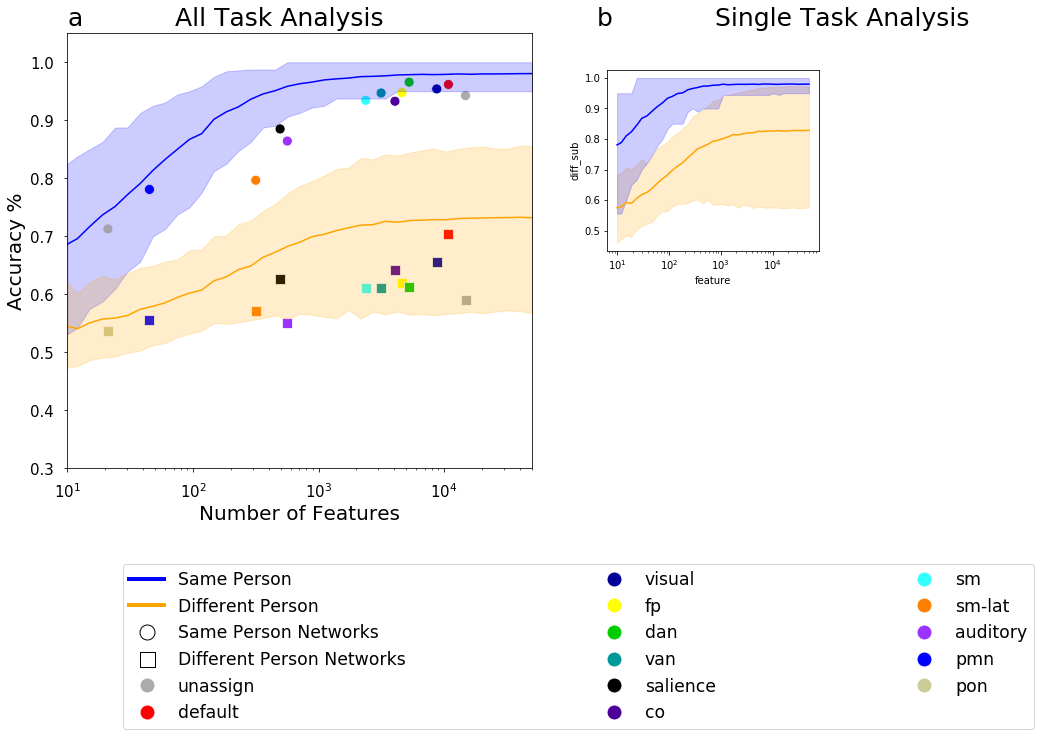

In [14]:
CV_z=pd.read_csv(randDir+'CV/zscore_splitTask.csv')
DS_z=pd.read_csv(randDir+'DS/zscore_splitTask.csv')

percentiles_CV_task=rand_DS.groupby(['feature','task']).agg({'same_sub': [p5, p95]})
percentiles_CV_task.columns = percentiles_CV_task.columns.droplevel()
percentiles_CV_task.reset_index(inplace=True)


percentiles_DS_task=rand_DS.groupby(['feature','task']).agg({'diff_sub': [p5, p95]})
percentiles_DS_task.columns = percentiles_DS_task.columns.droplevel()
percentiles_DS_task.reset_index(inplace=True)


fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)



fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax6=fig.add_subplot(gs00[0:,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_ALL, ci=None, ax=ax6,color='blue')
ax = sns.lineplot(x="feature", y='diff_sub',data=rand_ALL, ci=None,ax=ax6,color='orange')
g=sns.scatterplot(x='feature', y='same_sub', hue='Network', data=ALL_z, ax=ax6, color='r',legend=False,s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=ALL_z, ax=ax6, color='r',legend=False,s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s')
ax.fill_between(percentiles_ALL_SS['feature'],percentiles_ALL_SS['p5'],percentiles_ALL_SS['p95'],alpha=.2,color='blue')
ax.fill_between(percentiles_ALL_DS['feature'],percentiles_ALL_DS['p5'],percentiles_ALL_DS['p95'],alpha=.2,color='orange')
ax6.set_ylabel("Accuracy %",fontsize=20)
ax6.set_xlabel('Number of Features',fontsize=20)
ax6.set(ylim=(0, 1),xlim=(10,50000))
ax6.tick_params(labelsize=15,pad=10)
ax6.set(ylim=(.3, 1.05),xlim=(10,50000))
#ax6.set_title('All Task Analysis',fontsize=20, pad=10)
ax6.set(xscale="log")


ax6.legend(handles=comb_legend_elements,bbox_to_anchor=(.1,-1.2,2,1),mode='expand',ncol=3,fontsize='xx-large')

#CV split up tasks
ax1=fig.add_subplot(gs01[1,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='motor'],ci=None, color='blue',ax=ax1)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='motor'],ci=None, color='orange',ax=ax1)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='motor'].feature,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p5,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='motor'].feature,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p5,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='motor'],ax=ax1, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='motor'],ax=ax1, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Motor',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
plt.setp(ax1.get_xticklabels(), visible=False)


ax2=fig.add_subplot(gs01[1,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='glass'],ci=None, color='blue',ax=ax2)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='glass'],ci=None, color='orange',ax=ax2)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='glass'].feature,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p5,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='glass'].feature,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p5,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='glass'],ax=ax2, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='glass'],ax=ax2, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])

ax.set_title('Coherence',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
plt.setp(ax2.get_xticklabels(), visible=False)
ax3=fig.add_subplot(gs01[2,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='mem'],ci=None, color='blue',ax=ax3)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='mem'],ci=None, color='orange',ax=ax3)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='mem'].feature,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p5,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='mem'].feature,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p5,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='mem'], ax=ax3,color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='mem'],ax=ax3, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Memory',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))




ax4=fig.add_subplot(gs01[2,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='semantic'],ci=None, color='blue',ax=ax4)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='semantic'],ci=None, color='orange',ax=ax4)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='semantic'].feature,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p5,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='semantic'].feature,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p5,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='semantic'],ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='semantic'],ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Semantic',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))

plt.savefig(thisDir+'output/FigsFinal/split_task_feature_plots.png', bbox_inches='tight')



NameError: name 'rand_ALL' is not defined

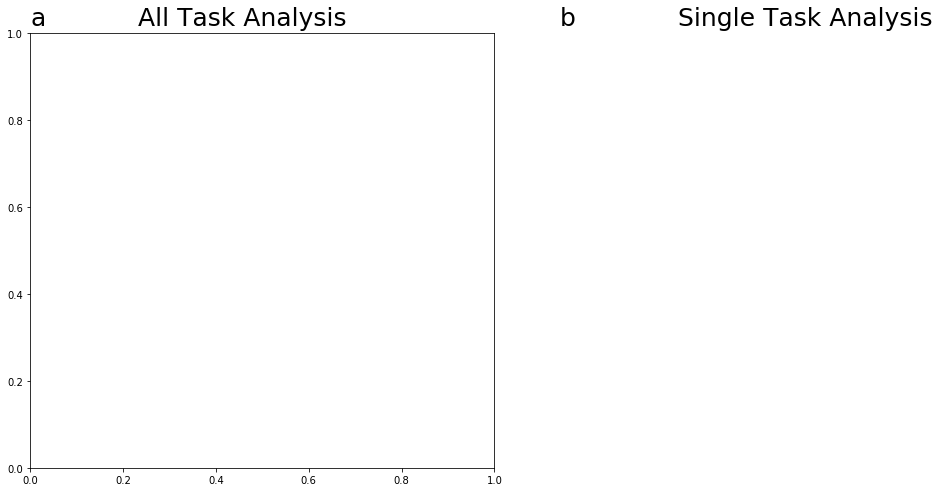

In [54]:
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)



fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax6=fig.add_subplot(gs00[0:,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_ALL,hue='train', ci=None, ax=ax6,color='r', palette=['1','2','3','4','5','6','7','10'])
ax = sns.lineplot(x="feature", y='diff_sub',data=rand_ALL,hue='train', ci=None,ax=ax6,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_ALL_SS['feature'],percentiles_ALL_SS['p5'],percentiles_ALL_SS['p95'],alpha=.1,color='blue')
ax.fill_between(percentiles_ALL_DS['feature'],percentiles_ALL_DS['p5'],percentiles_ALL_DS['p95'],alpha=.1,color='orange')
ax6.set_ylabel("Accuracy %",fontsize=20)
ax6.set_xlabel('Number of Features',fontsize=20)
ax6.tick_params(labelsize=15,pad=10)
ax6.set(ylim=(.3, 1),xlim=(10,50000))
ax6.set(xscale="log")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],loc='lower right',fontsize='large')

#CV split up tasks
ax1=fig.add_subplot(gs01[1,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='motor'],hue='train',ci=None,ax=ax1,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='motor'],hue='train',ci=None,ax=ax1,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='motor'].feature,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p5,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='motor'].feature,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p5,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Motor',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))
plt.setp(ax1.get_xticklabels(), visible=False)


ax2=fig.add_subplot(gs01[1,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='glass'],hue='train',ci=None, ax=ax2,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='glass'],hue='train',ci=None,ax=ax2,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='glass'].feature,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p5,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='glass'].feature,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p5,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Coherence',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))
plt.setp(ax2.get_xticklabels(), visible=False)
ax3=fig.add_subplot(gs01[2,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='mem'],hue='train',ci=None, ax=ax3,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='mem'],hue='train',ci=None, ax=ax3,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='mem'].feature,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p5,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='mem'].feature,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p5,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Memory',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))




ax4=fig.add_subplot(gs01[2,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='semantic'],hue='train',ci=None,ax=ax4,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='semantic'],hue='train',ci=None,ax=ax4,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='semantic'].feature,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p5,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='semantic'].feature,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p5,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Semantic',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))
plt.savefig(figsDir+'split_sub_feature_plots.png', bbox_inches='tight')



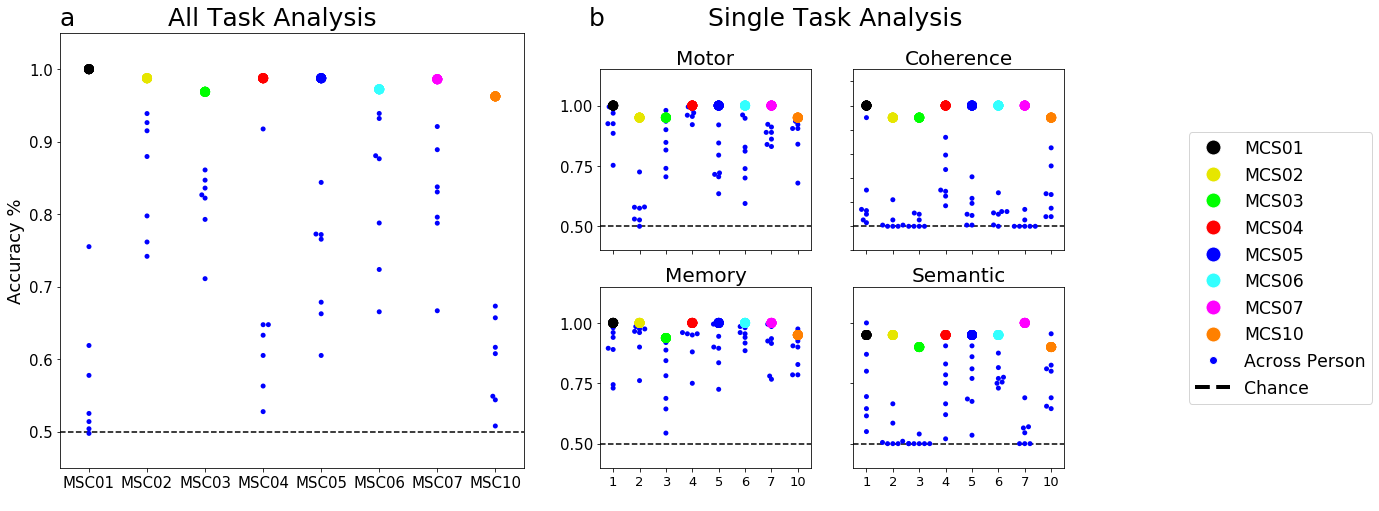

In [82]:
comb_legend=[Line2D([0], [0],  color='w',markerfacecolor=MSCdict['1'],marker='o',markersize=15,label='MCS01'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['2'],marker='o',markersize=15,label='MCS02'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['3'],marker='o',markersize=15,label='MCS03'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['4'],marker='o',markersize=15,label='MCS04'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['5'],marker='o',markersize=15,label='MCS05'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['6'],marker='o',markersize=15,label='MCS06'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['7'],marker='o',markersize=15,label='MCS07'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['10'],marker='o',markersize=15,label='MCS10'),
                    Line2D([0], [0], color='w', markerfacecolor='blue',marker='o',markersize=8,label='Across Person'),
                    Line2D([0], [0], color='black', lw=4, linestyle='--',label='Chance')]


fig = plt.figure(figsize=(15,8),constrained_layout=False)

gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48, wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)

fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])#:2])
ax=sns.swarmplot(x="train_sub",y="acc",  data=allTask_Binary[allTask_Binary['Analysis']=='diff_sub'],ax=ax0,color='blue')
sns.stripplot(x='train_sub',y='acc',data=allTask_Binary[allTask_Binary['Analysis']=='same_sub'],color='r', ax=ax0,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.set(ylim=(.45, 1.05))
ax.axhline(.5,color='black',linestyle="--")
plt.ylabel("Accuracy %", fontsize=18)
plt.xlabel(' ')
ax.tick_params(labelsize=15)
#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='motor'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='motor'),'acc'].values, ax=ax1, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'acc'].values,color='r', ax=ax1,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.set_title('Motor', fontsize=20, pad=5)
ax.axhline(.5,color='black',linestyle="--")
plt.xlabel('')
plt.ylabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(.4, 1.15))
ax.tick_params('y',labelsize=15)
plt.setp(ax1.get_xticklabels(), visible=False)
L1=plt.legend(handles=comb_legend,bbox_to_anchor=(3.7, .7),fontsize='xx-large')
#coherence
ax2=fig.add_subplot(gs01[1,1])
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='glass'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='glass'),'acc'].values, ax=ax2, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'acc'].values,color='r', ax=ax2,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.axhline(.5,color='black',linestyle="--")
ax.set_title('Coherence', fontsize=20, pad=5)
ax.set(ylim=(.4, 1.15))
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='mem'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='mem'),'acc'].values, ax=ax3, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='mem'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='mem'),'acc'].values,color='r', ax=ax3,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5,color='black',linestyle="--")
plt.ylabel(' ')
ax.set(ylim=(.4, 1.15))
plt.xlabel(' ')
ax.set_xticklabels(['1', '2','3','4','5','6','7','10'])
y=[.5,.75,1.0]
plt.yticks(y)
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=15)
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='semantic'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='semantic'),'acc'].values, ax=ax4, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='semantic'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='semantic'),'acc'].values,color='r', ax=ax4,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.set_title('Semantic', fontsize=20, pad=5)
plt.ylabel('')
plt.xlabel('')
ax.axhline(.5,color='black',linestyle="--")
ax.set(ylim=(.4, 1.15))
ax.set_xticklabels(['1', '2','3','4','5','6','7','10'])
ax.tick_params('x',labelsize=13)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.savefig(figsDir+'ALL_plots_swarm.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05



ValueError: Could not generate a palette for <map object at 0x7f872f985e48>

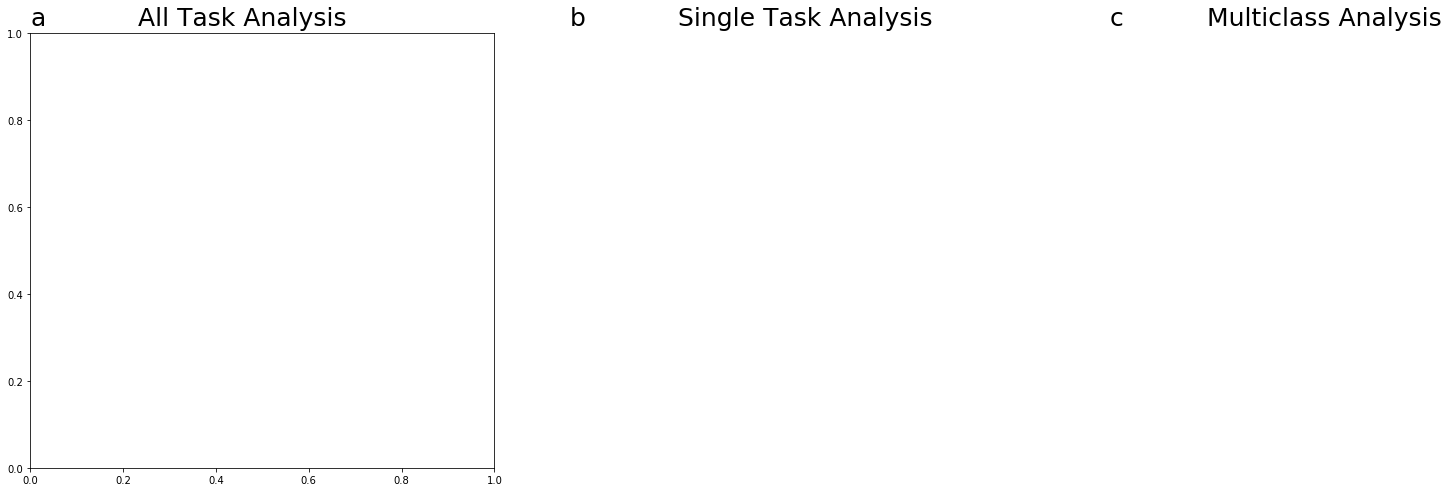

In [29]:
#Same Task (Fig 1)
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)
gs02 = fig.add_gridspec(nrows=2, ncols=1, left=1.05, right=1.45,
                        wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=.55, right=.98,height_ratios=[.001,1,1], hspace=.3)
fig.text(.05, .893, 'a',fontsize=25)
fig.text(.55, .893, 'b',fontsize=25)
fig.text(1.05, .893, 'c',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)
fig.text(1.14, .893, 'Multiclass Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=allTask_Binary, dodge=.1,order=['same_sub','diff_sub'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
plt.text(1.2, .97, '***',fontsize=25)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=18)
ax.set(ylim=(.45, 1.05))
plt.legend(loc='center left',fontsize='x-large',bbox_to_anchor=(.03, .32))
ax.axhline(.5, ls='--',color='red')
plt.xlabel(' ')
ax.tick_params(labelsize=18)

ax00=fig.add_subplot(gs02[0:,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train",ci=None, data=MC,ax=ax00, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.2, .92, '***',fontsize=25)
#ax.set_title('Multiclass', fontsize=20, pad=10)
y=[.2,.4,.6,.8,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
ax.axhline(.2,color='red',linestyle='--')
#plt.legend(loc='lower left',fontsize='medium',bbox_to_anchor=(.03, .04))
#plt.legend(loc='center left',fontsize='x-large',bbox_to_anchor=(.07, .39))
plt.xlabel(' ')
plt.ylabel(' ')
ax.legend_.remove()
ax.set(ylim=(0, 1.05))
ax.tick_params(labelsize=18)

#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='motor'], ax=ax1, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('Motor', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(.45, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
plt.setp(ax1.get_xticklabels(), visible=False)
#coherence
ax2=fig.add_subplot(gs01[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='glass'], ax=ax2, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
plt.text(1.13, .9, '***',fontsize=20)
ax.set_title('Coherence', fontsize=20, pad=5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
ax.axhline(.5, ls='--',color='red')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='mem'],ax=ax3, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5, ls='--',color='red')
plt.ylabel(' ')
plt.xlabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=15)
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='semantic'],ax=ax4, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Semantic', fontsize=20, pad=5)
ax.set_xticklabels(['Same Person','Different Person'])
plt.ylabel('')
ax.set(ylim=(.45, 1.05))
plt.xlabel('')
plt.text(1.13, .95, '***',fontsize=20)
ax.axhline(.5, ls='--',color='red')
ax.legend_.remove()
ax.tick_params('x',labelsize=15)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
plt.setp(ax4.get_yticklabels(), visible=False)
#plt.savefig(figsDir+'MC_ALL_CVDS_point_plots.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05



In [3]:
#memPres=pd.read_csv(thisDir+'Ridge/single_task/mem_pres_acc.csv',usecols=['train_sub','task','same_sub','diff_sub'])
#mem=pd.melt(memPres,id_vars=['train_sub','task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')

memSep=pd.read_csv(thisDir+'Ridge/single_task/sep_mem_pres_accCG.csv',usecols=['train_sub','train_task','test_task','test_sub','same_sub','diff_sub'])
#SS=memSep.loc[336:]
SS_f=pd.melt(memSep,id_vars=['train_sub','train_task','test_task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')


group_mem=pd.read_csv(thisDir+'Ridge/single_task/memPres_groupwise_acc.csv')
gMem = pd.melt(group_mem, id_vars = ['train_task','test_task'],value_vars = ['groupwise','wtn'], var_name = "Analysis", value_name = 'acc')
#SS_f['test_task']=np.where(SS_f['Analysis']=='same_sub',SS_f['train_task'],SS_f['test_task'])
groupMemPres=gMem.groupby(['train_task','Analysis']).mean()
gMem_all = gMem.groupby(['Analysis']).mean()



In [172]:
#groupMemPres.loc['pres1', 'groupwise']
#groupMemPres.loc['pres1'].acc


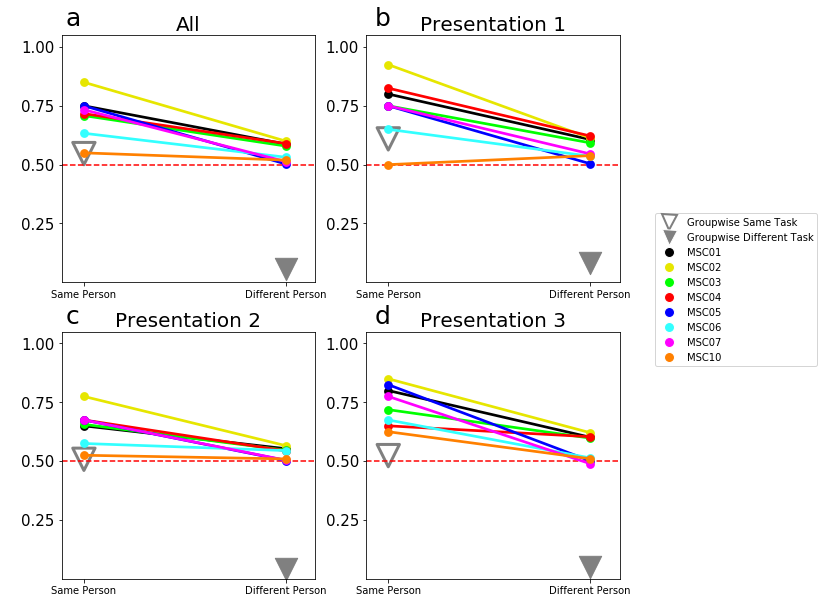

In [25]:
#sns.set(rc={"figure.figsize": (6, 6)})
#np.random.seed(sum(map(ord, "palettes")))
from matplotlib.patches import Patch
legend = [Line2D([0], [0], color='w',markeredgecolor='gray',markeredgewidth=2,markerfacecolor='none', marker='v', markersize=15, label='Groupwise Same Task'),
          Line2D([0], [0], color='w',markerfacecolor='gray', marker='v',markersize=15,label='Groupwise Different Task'),
                Line2D([0], [0],  color='w',markerfacecolor=MSCdict['1'],marker='o',markersize=10,label='MSC01'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['2'],marker='o',markersize=10,label='MSC02'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['3'],marker='o',markersize=10,label='MSC03'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['4'],marker='o',markersize=10,label='MSC04'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['5'],marker='o',markersize=10,label='MSC05'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['6'],marker='o',markersize=10,label='MSC06'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['7'],marker='o',markersize=10,label='MSC07'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['10'],marker='o',markersize=10,label='MSC10')]
fig = plt.figure(figsize=(10,10),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=2)
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)
pres1_idx=np.where((SS_f['train_task']=='pres1'))
pres2_idx=np.where((SS_f['train_task']=='pres2'))
pres3_idx=np.where((SS_f['train_task']=='pres3'))


fig.text(.13, .893, 'a',fontsize=25)
fig.text(.56, .893, 'b',fontsize=25)
fig.text(.13, .48, 'c',fontsize=25)
fig.text(.56, .48, 'd',fontsize=25)
ax0=fig.add_subplot(gs00[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=SS_f, ax=ax0, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('All', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
y=[.25,.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(0, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')

ax0.scatter(x=1,y=gMem_all.loc['groupwise'].acc,s=500,color='gray',marker="v")
ax0.scatter(x=0,y=gMem_all.loc['wtn'].acc,s=500,color='gray',marker="v", facecolors='none',linewidths=3)

#Presentation1
ax1=fig.add_subplot(gs00[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=SS_f.loc[pres1_idx], ax=ax1, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('Presentation 1', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
#y=[.5,.75,1.0]
plt.yticks(y)
#ax.set(ylim=(.45, 1.05))
ax.set(ylim=(0, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')

ax1.scatter(x=1,y=groupMemPres.loc['pres1','groupwise'].acc,s=500,color='gray',marker="v")
ax1.scatter(x=0,y=groupMemPres.loc['pres1','wtn'].acc,s=500,color='gray',marker="v", facecolors='none',linewidths=3)


#Presentation2 
ax2=fig.add_subplot(gs00[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=SS_f.loc[pres2_idx], ax=ax2, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('Presentation 2', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
#y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(0, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')

ax2.scatter(x=1,y=groupMemPres.loc['pres2','groupwise'].acc,s=500,color='gray',marker="v")
ax2.scatter(x=0,y=groupMemPres.loc['pres2','wtn'].acc,s=500,color='gray',marker="v", facecolors='none',linewidths=3)

#Presentation3
ax3=fig.add_subplot(gs00[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=SS_f.loc[pres3_idx], ax=ax3, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
#ax.legend_.remove()
#handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = legend, bbox_to_anchor = (1.8,1.5))
#ax.legend(handles=handles[:], labels=labels[:],loc='upper right',fontsize='large', bbox_to_anchor=(1.5, 1.5))
ax.set_title('Presentation 3', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
#y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(0, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')


ax3.scatter(x=1,y=groupMemPres.loc['pres3','groupwise'].acc,s=500,color='gray',marker="v")
ax3.scatter(x=0,y=groupMemPres.loc['pres3','wtn'].acc,s=500,color='gray',marker="v", facecolors='none',linewidths=3)
plt.savefig(figsDir+'groupwise_diffSub_point_plots.png', bbox_inches='tight')




In [4]:
memSep=pd.read_csv(thisDir+'Ridge/single_task/sep_mem_pres_accCG.csv',usecols=['train_sub','train_task','test_task','test_sub','same_sub','diff_sub'])
#SS=memSep.loc[336:]
SS_f=pd.melt(memSep,id_vars=['train_sub','train_task','test_task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')

SS_f['test_task']=np.where(SS_f['Analysis']=='same_sub',SS_f['train_task'],SS_f['test_task'])

In [7]:

DS=memSep.loc[:335]
DS.drop(columns=['same_sub','train_sub','test_sub'],inplace=True)
DS.head()

,train_task,test_task,diff_sub
0,pres1,pres2,0.55000
1,pres1,pres3,0.62500
2,pres2,pres3,0.50000
3,pres1,pres2,0.63125
4,pres1,pres3,0.63125


In [9]:
DS_S=mem[mem['Analysis']=='diff_sub']
DS_S.rename(columns={'acc':'diff_sub','task':'train_task'},inplace=True)
DS_S['test_task']=DS_S['train_task']

F=pd.concat([DS,DS_S])


NameError: name 'mem' is not defined

In [63]:
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10','groupwise']
group = pd.DataFrame()
conSub=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for i in conSub:
    tmp = pd.read_csv(thisDir+'Ridge/ALL_Binary/fw/'+i+'.csv', header= None).T
    tmp.rename(columns = {0:i},inplace=True)
    group=pd.concat([group, tmp], axis=1)
groupwise = pd.read_csv(thisDir+'Ridge/ALL_Binary/fw/groupwise_fw.csv', header= None).T  
groupwise.rename(columns={0:'groupwise'},inplace=True)
total = pd.concat([group, groupwise], axis = 1)
sem = pd.DataFrame()  
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_semantic.csv', header= None).T
    tmp.rename(columns = {0:i},inplace=True)
    sem=pd.concat([sem, tmp], axis=1)
mem = pd.DataFrame()  
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_mem.csv', header= None).T
    tmp.rename(columns = {0:i},inplace=True)
    mem=pd.concat([mem, tmp], axis=1)
glass = pd.DataFrame()  
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_glass.csv', header= None).T
    tmp.rename(columns = {0:i},inplace=True)
    glass=pd.concat([glass, tmp], axis=1)
motor = pd.DataFrame()  
for i in subList:
    tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/'+i+'_semantic.csv', header= None).T
    tmp.rename(columns = {0:i},inplace=True)
    motor=pd.concat([motor, tmp], axis=1)
    

sem['type'] = "semantic"
mem['type'] = "memory"
glass['type'] = "coherence"
motor['type'] = "motor"
full_fw = pd.concat([sem, mem, glass, motor])

fw = full_fw.pivot(columns = "type")
fw_corr = fw.corr()
total_group=total.corr()
#full_fw['test']=full_fw['type']

#fw_corr = full_fw.groupby(['type','test']).corr()

#fw_corr.reset_index(inplace = True)
#multi = fw_corr.set_index(["level_2","type","test"]).sort_index()

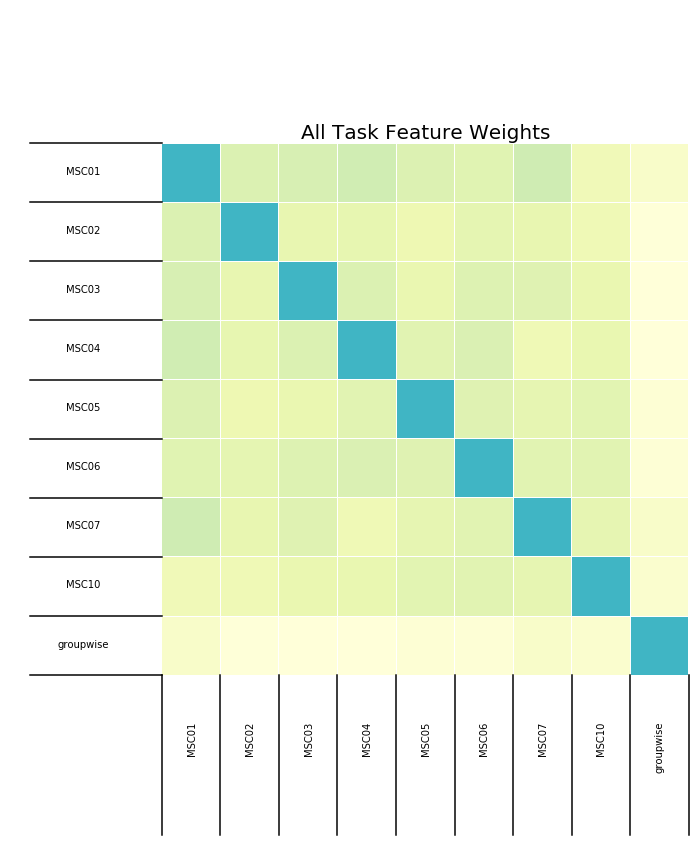

In [107]:
from itertools import groupby
def gw_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def gw_label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]
def gw_final_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)    
    
def gw_label_group_bar_table(ax, df):
    xpos = -.25
    scale = 1./df.index.size
    pos = df.index.size
    for label, rpos in gw_label_len(df.index,0):
        gw_add_line(ax, pos*scale, xpos)
        pos -= rpos
        lypos = (pos + .5 * rpos)*scale
        ax.text(xpos+.1, lypos-.002, label, ha='center', transform=ax.transAxes)
    gw_final_add_line(ax, pos*scale , xpos)
    xpos += .1
    
def gw_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([xpos+.14, xpos+.14], [ypos, ypos + .3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def gw_final_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([1,1], [0, -.3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def gw_Xlabel_group_bar_table(ax, df):
    ypos = -.3
    scale = 1./df.columns.size
    pos = -1.26
    for label, rpos in gw_label_len(df.columns,0):
        gw_Xadd_line(ax, pos*scale, ypos)
        pos += rpos
        lypos = (pos + .5 * rpos)*scale
        ax.text(lypos+.03,ypos+.2, label, ha='center', rotation='vertical',transform=ax.transAxes)
    gw_final_Xadd_line(ax, pos*scale , ypos)
    ypos += .1    

g = sns.clustermap(total_group, center = 1, row_cluster = False,  col_cluster = False, cmap = "YlGnBu",yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (10, 10))
g.cax.set_visible(False)
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("All Task Feature Weights", fontsize=20, pad=5)
plt.title("Correlation (r)")
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
gw_label_group_bar_table(g.ax_heatmap, total_group)
gw_Xlabel_group_bar_table(g.ax_heatmap, total_group)

plt.savefig(figsDir+'allBinary_fw_across_sub_heatmap.png', bbox_inches='tight')



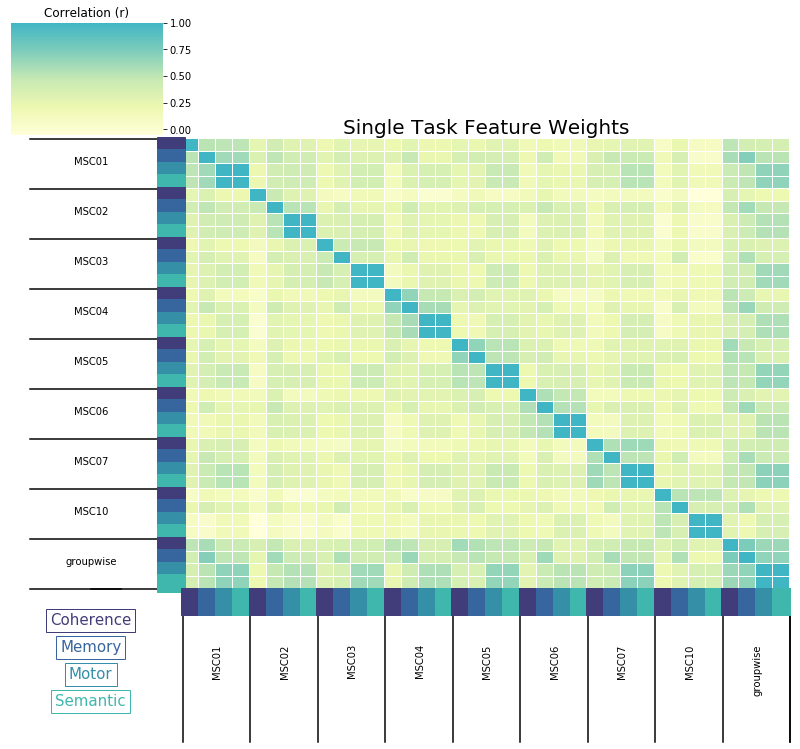

In [96]:
from itertools import groupby
import matplotlib.collections as collections
legend=[Line2D([0], [0], color='#37659e', lw=4,label='Memory'),
                   Line2D([0], [0], color='#348fa7', lw=4, label='Motor'),
                Line2D([0], [0], color='#40b7ad', lw=4,label='Semantic'),
                Line2D([0], [0], color='#413d7b', lw=4,label='Coherence')]
taskColors=dict([('coherence','#413d7b'),('semantic','#40b7ad'),('motor','#348fa7'),('memory','#37659e')])
def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def final_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .15], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)    
    
def Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([xpos+.14, xpos+.14], [ypos, ypos + .3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def final_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([1,1], [0, -.34], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]


def label_group_bar_table(ax, df):
    xpos = -.25
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            if level ==0:
                add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            if level ==1:
                ax.text(xpos+.132,lypos-.008, "test", color=taskColors[label], ha='center',transform=ax.transAxes,bbox=dict(facecolor=taskColors[label], edgecolor= taskColors[label]))
            else:
                ax.text(xpos+.1, lypos-.002, label, ha='center', transform=ax.transAxes)
        final_add_line(ax, pos*scale , xpos)
        xpos += .1

def Xlabel_group_bar_table(ax, df):
    ypos = -.34
    scale = 1./df.columns.size
    for level in range(df.columns.nlevels):
        if level == 0:
            pos = -5
        else:
            pos = -1#df.columns.size
        for label, rpos in label_len(df.columns,level):
            if level ==0:
                Xadd_line(ax, pos*scale, ypos)
            pos += rpos
            lypos = (pos + .5 * rpos)*scale
            if level == 1:
                ax.text(lypos,ypos+.215, 'test',color=taskColors[label], ha='center', rotation='vertical',transform=ax.transAxes,bbox=dict(facecolor=taskColors[label], edgecolor= taskColors[label]))
            else:
                ax.text(lypos+.03,ypos+.2, label, ha='center', rotation='vertical',transform=ax.transAxes)
        final_Xadd_line(ax, pos*scale , ypos)
        ypos += .1

g = sns.clustermap(fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu", yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (15, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("Single Task Feature Weights", fontsize=20, pad=5)
plt.title("Correlation (r)")
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
label_group_bar_table(g.ax_heatmap, fw_corr)
Xlabel_group_bar_table(g.ax_heatmap, fw_corr)
g.fig.subplots_adjust(left = 0.15)
g.ax_heatmap.text(-.15,-.14, "Memory", fontsize= 15, color=taskColors['memory'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['memory']))
g.ax_heatmap.text(-.15,-.2, "Motor", fontsize= 15, color=taskColors['motor'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['motor']))
g.ax_heatmap.text(-.15,-.08, "Coherence", fontsize= 15, color=taskColors['coherence'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['coherence']))
g.ax_heatmap.text(-.15,-.26, "Semantic", fontsize= 15, color=taskColors['semantic'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['semantic']))



plt.savefig(figsDir+'fw_across_sub_heatmap.png', bbox_inches='tight')



In [2]:
import glob
import re
li = []
# set search path and glob for files
# here we want to look for csv files in the input directory
for t in taskList:
    for sub in subList:
        path = homeDir+'data/behav/' + t
        files = glob.glob(path + '/*'+sub+'*.tsv')
        # loop through list of files and read each one into a dataframe and append to list
        for f in files:
            # read in csv
            temp_df = pd.read_csv(f, sep = '\t')
            match=re.search(r"func\d{2}",f)
            temp_df['session'] = match.group()
            temp_df['sub'] = sub
            temp_df['task'] =t
            # append df to list
            li.append(temp_df)

        # concatenate our list of dataframes into one!
df = pd.concat(li, axis=0)

#test = pd.read_csv(homeDir + 'data/behav/glass/sub-MSC01_ses-func01_func_sub-MSC01_ses-func01_task-glasslexical_run-01_events.tsv', sep = '\t')






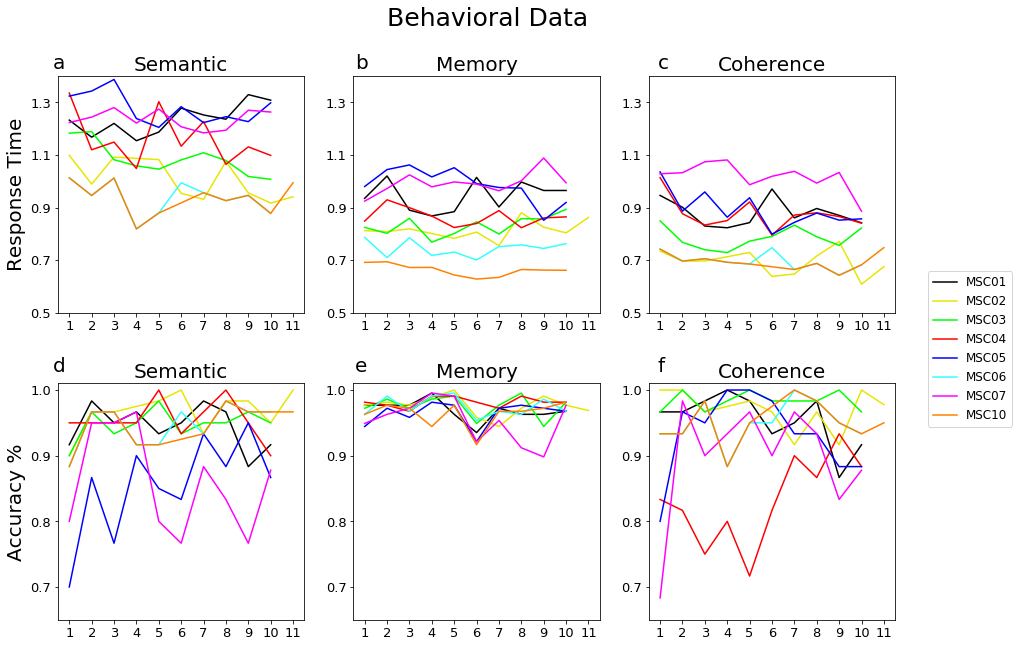

In [118]:
fig=plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(nrows=2, ncols=3,hspace=.3)
fig.text(.43, .95, 'Behavioral Data',fontsize=25)
fig.text(.12, .89, 'a',fontsize=20)
fig.text(.4, .89, 'b',fontsize=20)
fig.text(.68, .89, 'c',fontsize=20)

fig.text(.12, .47, 'd',fontsize=20)
fig.text(.4, .47, 'e',fontsize=20)
fig.text(.68, .47, 'f',fontsize=20)
ax1=fig.add_subplot(gs[0,0])
sem = df.loc[(df['trial_type']=='Noun') | (df['trial_type']=='Verb')]
sem_avg = sem.groupby(['session','sub']).mean()
ax = sns.lineplot(x= "session", y = "response_time", hue = "sub", data = sem_avg, ci = None, color='r', palette=['1','2','3','4','5','6','7','10'], ax = ax1)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.legend_.remove()
ax.set_title('Semantic',fontsize=20)
ax.set_ylabel("Response Time", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1.4))
y=[.5,.7,.9,1.1,1.3]
plt.yticks(y)
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=13)

ax2=fig.add_subplot(gs[0,1])
mem = df[df['task']=='mem']
mem_avg =mem.groupby(['session','sub']).mean()
ax = sns.lineplot(x= "session", y = "response_time", hue = "sub", data = mem_avg, ci = None, color='r', palette=['1','2','3','4','5','6','7','10'], ax = ax2)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.legend_.remove()
ax.set_title('Memory',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1.4))
y=[.5,.7,.9,1.1,1.3]
plt.yticks(y)
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=13)

ax3=fig.add_subplot(gs[0,2])
glass = df.loc[(df['trial_type']=='Glass_coherent') | (df['trial_type']=='Glass_random')]
glass_avg =glass.groupby(['session','sub']).mean()
ax = sns.lineplot(x= "session", y = "response_time", hue = "sub", data = glass_avg, ci = None, color='r', palette=['1','2','3','4','5','6','7','10'], ax = ax3)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:],loc='upper right',fontsize='large',bbox_to_anchor=(1.5, 0.2))
ax.set_title('Coherence',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1.4))
y=[.5,.7,.9,1.1,1.3]
plt.yticks(y)                                                                                    
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=13)



###############
ax4=fig.add_subplot(gs[1,0])
sem_corr=sem[sem['correct'] == 'corr'].groupby(['sub','session']).size().reset_index(name='count') 
sem_total=sem.groupby(['sub','session']).size().reset_index(name='total') 
sem_count = sem_corr.merge(sem_total,how='left',on=['sub','session'])
sem_count['acc']=sem_count['count']/sem_count['total']

ax = sns.lineplot(x= "session", y = "acc", hue = "sub", data = sem_count, ci = None, color='r', palette=['1','2','3','4','5','6','7','10'], ax = ax4)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.legend_.remove()
ax.set_title('Semantic', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Accuracy %', fontsize = 20)
ax.set(ylim=(.65, 1.01))
y=[.7,.8,.9,1]
plt.yticks(y)
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=13)

ax5=fig.add_subplot(gs[1,1])
mem_corr=mem[mem['correct'] == 'corr'].groupby(['sub','session']).size().reset_index(name='count') 
mem_total=mem.groupby(['sub','session']).size().reset_index(name='total') 
mem_count = mem_corr.merge(mem_total,how='left',on=['sub','session'])
mem_count['acc']=mem_count['count']/mem_count['total']
ax = sns.lineplot(x= "session", y = "acc", hue = "sub", data = mem_count, ci = None, color='r', palette=['1','2','3','4','5','6','7','10'], ax = ax5)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.legend_.remove()
ax.set_title('Memory',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.65, 1.01))
y=[.7,.8,.9,1]
plt.yticks(y)
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=13)

ax6=fig.add_subplot(gs[1,2])
glass_corr=glass[glass['correct'] == 'corr'].groupby(['sub','session']).size().reset_index(name='count') 
glass_total=glass.groupby(['sub','session']).size().reset_index(name='total') 
glass_count = glass_corr.merge(glass_total,how='left',on=['sub','session'])
glass_count['acc']=glass_count['count']/glass_count['total']
ax = sns.lineplot(x= "session", y = "acc", hue = "sub", data = glass_count, ci = None, color='r', palette=['1','2','3','4','5','6','7','10'], ax = ax6)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.legend_.remove()
ax.set_title('Coherence',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.65, 1.01))
y=[.7,.8,.9,1]
plt.yticks(y) 
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=13)

plt.savefig(figsDir+'behav_data.png', bbox_inches='tight')


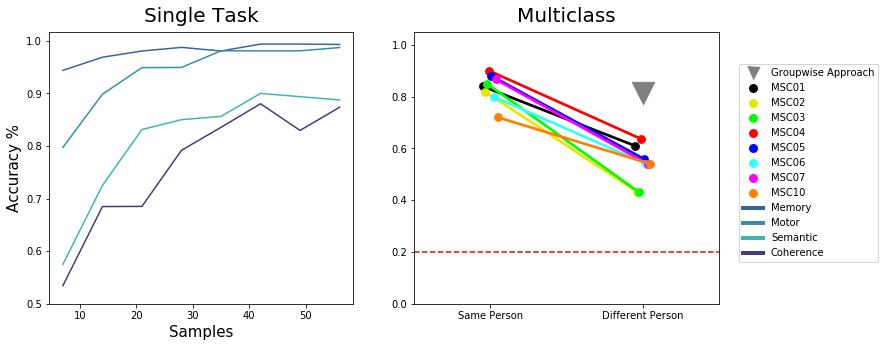

In [58]:
fig=plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2,hspace=.3)

ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x= "samples", y = "acc", hue = "task", data = incremental, ax = ax1,hue_order = ['mem','motor','semantic','glass'],palette=['#37659e','#348fa7','#40b7ad','#413d7b'])
plt.ylabel("Accuracy %", fontsize=15)
ax.legend_.remove()
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.xlabel("Samples", fontsize=15)
ax.set_title('Single Task', fontsize=20, pad=10)
ax2=fig.add_subplot(gs[0,1])
ax2.scatter(x=1,y=g_MC,s=500,color='gray',marker="v")
ax=sns.pointplot(x="Analysis",y="acc", hue="train",ci=None, data=MC, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax2)
ax.set_title('Multiclass', fontsize=20, pad=10)
ax2.legend(handles=legend_elements,bbox_to_anchor=(1.05, .9))


plt.ylabel(" ", fontsize=15)
ax.axhline(.2,color='red',linestyle='--')
plt.xlabel(' ')
ax.set(ylim=(0, 1.05))

plt.savefig(figsDir+'groupwise_sample_MC_data.png', bbox_inches='tight')


In [2]:
acrossTask = pd.read_csv(thisDir +'Ridge/single_task/across_task_acc.csv')

In [4]:
AT=acrossTask.groupby(['train_task','test_task','train_sub','Analysis']).mean()

In [7]:
AT.reset_index(inplace=True)
AT.to_csv(thisDir +'Ridge/single_task/r_format_across_task_acc.csv')

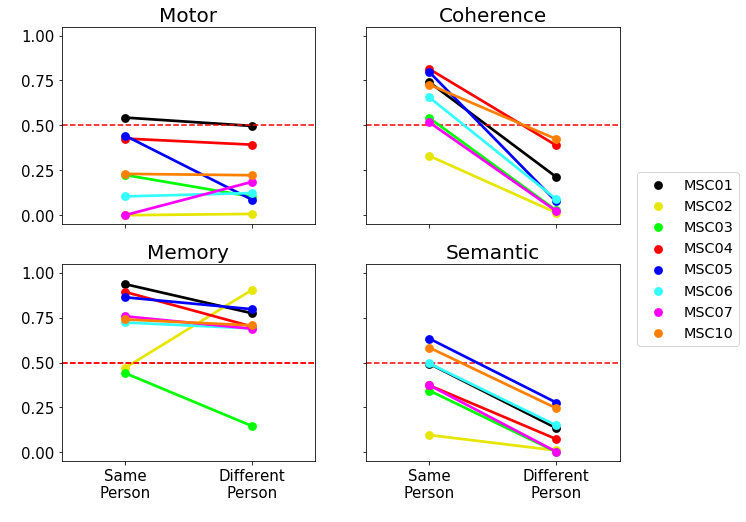

In [19]:
#Same Task (Fig 1)
fig = plt.figure(figsize=(10,8),constrained_layout=False)


gs01 = fig.add_gridspec(nrows=2, ncols=2)
#fig.text(.05, .893, 'a',fontsize=25)
#fig.text(.54, .893, 'b',fontsize=25)
#fig.text(.15, .893, 'All Task Analysis',fontsize=25)
#fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


#motor
ax1=fig.add_subplot(gs01[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=AT[AT['train_task']=='motor'], ax=ax1, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('Motor', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
y=[0,.25,.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(-.05, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
plt.setp(ax1.get_xticklabels(), visible=False)
#coherence
ax2=fig.add_subplot(gs01[0,1],sharey = ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=AT[AT['train_task']=='glass'], ax=ax2, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
ax.set_title('Coherence', fontsize=20, pad=5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
ax.axhline(.5, ls='--',color='red')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=AT[AT['train_task']=='mem'],ax=ax3, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5, ls='--',color='red')
plt.ylabel(' ')
plt.xlabel(' ')
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
ax4=fig.add_subplot(gs01[1,1],sharey=ax1)
ax.tick_params('x',labelsize=15)
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=AT[AT['train_task']=='semantic'],ax=ax4, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Semantic', fontsize=20, pad=5)
plt.ylabel('')
ax.set(ylim=(-.05, 1.05))
plt.xlabel('')
ax.axhline(.5, ls='--',color='red')
ax.legend_.remove()
ax.tick_params('x',labelsize=15)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
plt.legend(fontsize='x-large',bbox_to_anchor=(1.5, 1.5))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.savefig(figsDir+'acrossTask_point_plots.png', bbox_inches='tight')




In [28]:
AT[AT['train_task']=='sem']

,train_task,test_task,train_sub,Analysis,acc


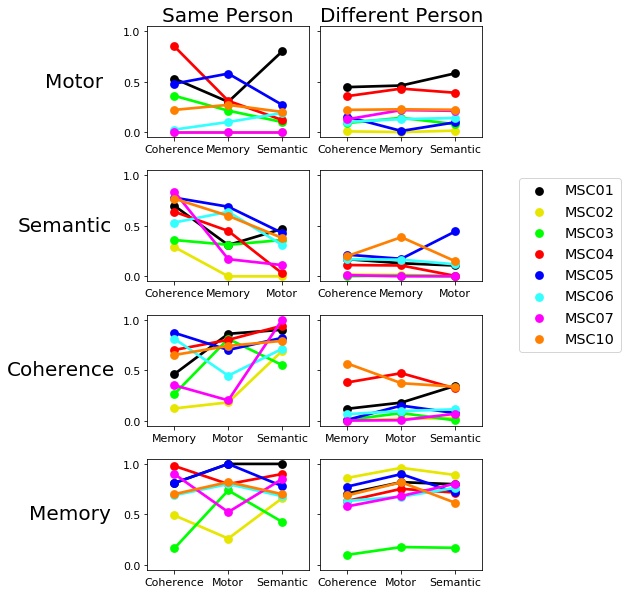

In [88]:
fig = plt.figure(figsize=(6,10),constrained_layout=False)


gs1 = fig.add_gridspec(nrows=4, ncols=2, hspace=.3,wspace=.07)

#Train motor
motor_SS = AT.loc[(AT['train_task']=='motor') & (AT['Analysis']=='Same Person')]
motor_DS = AT.loc[(AT['train_task']=='motor') & (AT['Analysis']=='Different Person')]
#Train semantic
sem_SS = AT.loc[(AT['train_task']=='semantic') & (AT['Analysis']=='Same Person')]
sem_DS = AT.loc[(AT['train_task']=='semantic') & (AT['Analysis']=='Different Person')]
#Train mem
mem_SS = AT.loc[(AT['train_task']=='mem') & (AT['Analysis']=='Same Person')]
mem_DS = AT.loc[(AT['train_task']=='mem') & (AT['Analysis']=='Different Person')]
#Train glass
glass_SS = AT.loc[(AT['train_task']=='glass') & (AT['Analysis']=='Same Person')]
glass_DS = AT.loc[(AT['train_task']=='glass') & (AT['Analysis']=='Different Person')]

ax1=fig.add_subplot(gs1[0,0])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax1, data=motor_SS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
ax.set_title('Same Person', fontsize=20, pad=5)
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Coherence', 'Memory', "Semantic"])
plt.text(-2.4, .45, 'Motor',fontsize=20)
ax.tick_params(labelsize=11)

ax2=fig.add_subplot(gs1[0,1])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax2, data=motor_DS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
ax.set_title('Different Person', fontsize=20, pad=5)
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Coherence', 'Memory', "Semantic"])
plt.setp(ax2.get_yticklabels(), visible=False)
ax.tick_params(labelsize=11)

ax3=fig.add_subplot(gs1[1,0])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax3, data=sem_SS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Coherence', 'Memory', "Motor"])
plt.text(-2.9, .45, 'Semantic',fontsize=20)
ax.tick_params(labelsize=11)

ax4=fig.add_subplot(gs1[1,1])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax4, data=sem_DS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Coherence', 'Memory', "Motor"])
plt.setp(ax4.get_yticklabels(), visible=False)
ax.tick_params(labelsize=11)
plt.legend(fontsize='x-large',bbox_to_anchor=(1.9, 1))

ax5=fig.add_subplot(gs1[2,0])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax5, data=glass_SS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Memory','Motor',  "Semantic"])
plt.text(-3.1, .45, 'Coherence',fontsize=20)
ax.tick_params(labelsize=11)

ax6=fig.add_subplot(gs1[2,1])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax6, data=glass_DS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Memory', 'Motor', "Semantic"])
plt.setp(ax6.get_yticklabels(), visible=False)
ax.tick_params(labelsize=11)

ax7=fig.add_subplot(gs1[3,0])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax7, data=mem_SS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Coherence',  "Motor", 'Semantic'])
plt.text(-2.7, .45, 'Memory',fontsize=20)
ax.tick_params(labelsize=11)

ax8=fig.add_subplot(gs1[3,1])
ax=sns.pointplot(x="test_task",y="acc", hue="train_sub", ci=None, ax = ax8, data=mem_DS, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set(ylim=(-.05, 1.05))
plt.ylabel(' ')
plt.xlabel(' ')
y=[0,.5,1.0]
plt.yticks(y)
ax.set_xticklabels(['Coherence', "Motor",'Semantic'])
plt.setp(ax8.get_yticklabels(), visible=False)
ax.tick_params(labelsize=11)

plt.savefig(figsDir+'sep_acrossTask_point_plots.png', bbox_inches='tight')
